# EDA of The Prices csv file

Imports.

Commentary on the results of various graphs is included in the comments below the code that generated that graph.

After finishing the initial EDA, you can change which read command is commented out, to check statistics for your cleaned file.


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import sklearn as skl

pd.set_option("display.max_columns", 555)
pd.set_option("display.max_rows", 555)

#df_prices_unclean = pd.read_csv('../data/house_prices/house_prices_cleaned_v2.csv')

df_prices_unclean = pd.read_csv('../data/house_prices/Uncleaned_house_prices.csv')


# Prices Exploration

In [66]:
df_prices_unclean.columns
#all the columns to examine

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [67]:
df_prices_unclean.dtypes
#Data types. Notably columns we deem important that are objects (probably all strings) will need to be encoded as numbers.

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [68]:
df_prices_unclean.describe()
#initial look at the measures of central tendancy of each numeric column. 

#some interesting stuff can be noticed such as:

#Some outliers are INSANELY far from the average. Like the largest house (LotArea) is 20 standard deviations away from the mean. Numbers like that will make our models less effective
#some columns are barely used by the majority of the houses. such as PoolArea
#No house has more than 3 fire places.

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [69]:
df_prices_unclean.head()
#an initial look at what kinds of values are in each column

#some columns may need to be removed as they are based on eachother in order to improve model performance, such  TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [70]:
df_prices_unclean.duplicated().sum()
#checking if any duplicate rows exist. Would clean them if so, but non are dupes.

0

In [71]:
df_prices_unclean.nunique()

#checking how many unique values are in each column.
#helps to ensure no "arbitrary" strings get encoded, such as if street name was included in the data set.
#if a column a small number of unique values it might be a good candidate to encode in our cleaned DF, depending on what the number represents

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          3
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [72]:
df_prices_unclean.isna().sum()

#a count of how many nans each column has (out of 1460 rows)

#columns with only a few NaN are fine to impute using the median (or other methods)
#when a column is mostly NaN though, thats a big red flag for that column. 
# Deleting the column may be the best way to deal with it as leaving it in with imputation will lead to meaningless noise in our dataset.

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [73]:

df_prices_unclean['MSSubClass'].value_counts()
#df_prices_unclean['Street'].value_counts()

#number of times each value shows up in a column. useful for checking what kinds of values a column has

#notably this reveals how whack MSSubCLass is even though its an int. (building class)
# May deserve to be turned into a feature if that makes more sense
# I can't find any information online about a number based building classification system, so I'll probably try both methods

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [74]:
for i in df_prices_unclean.columns:
    print(df_prices_unclean[i].value_counts().head(1))
    print("-----")


#For every column, show the single highest frequency value & count
#helps identify columns that may be better off deleted if theyre the same >95% of the time, such as Street which has the value Pave 1454/1460 times


Id
1    1
Name: count, dtype: int64
-----
MSSubClass
20    536
Name: count, dtype: int64
-----
MSZoning
RL    1151
Name: count, dtype: int64
-----
LotFrontage
60.0    143
Name: count, dtype: int64
-----
LotArea
7200    25
Name: count, dtype: int64
-----
Street
Pave    1454
Name: count, dtype: int64
-----
Alley
Grvl    50
Name: count, dtype: int64
-----
LotShape
Reg    925
Name: count, dtype: int64
-----
LandContour
Lvl    1311
Name: count, dtype: int64
-----
Utilities
AllPub    1459
Name: count, dtype: int64
-----
LotConfig
Inside    1052
Name: count, dtype: int64
-----
LandSlope
Gtl    1382
Name: count, dtype: int64
-----
Neighborhood
NAmes    225
Name: count, dtype: int64
-----
Condition1
Norm    1260
Name: count, dtype: int64
-----
Condition2
Norm    1445
Name: count, dtype: int64
-----
BldgType
1Fam    1220
Name: count, dtype: int64
-----
HouseStyle
1Story    726
Name: count, dtype: int64
-----
OverallQual
5    397
Name: count, dtype: int64
-----
OverallCond
5    821
Name: count, d

<Axes: xlabel='MSSubClass', ylabel='LotFrontage'>

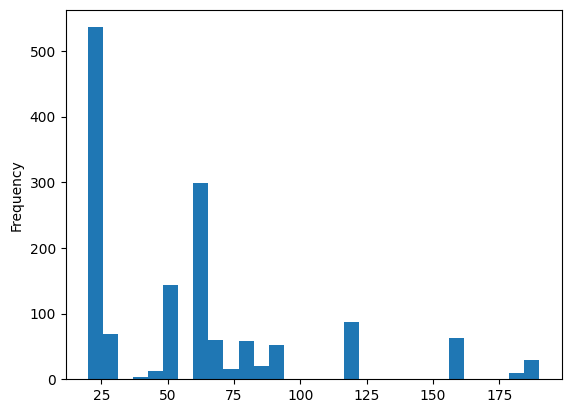

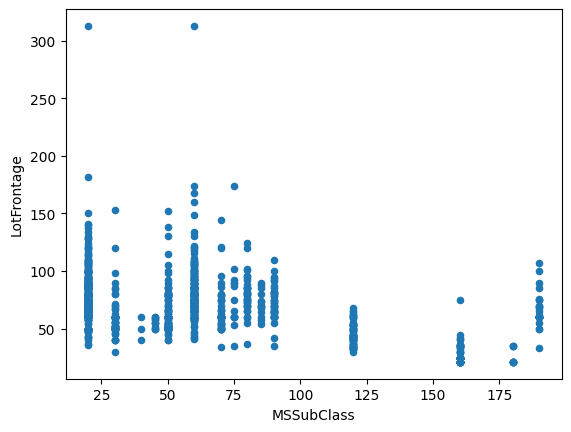

In [75]:
df_prices_unclean['MSSubClass'].plot(kind='hist', bins = 30)
df_prices_unclean.plot(kind='scatter', x = 'MSSubClass', y = 'LotFrontage')

#histograms to look at the distribution of a column, such as the odd MSSubClass
# Or scatter plots that can be used to compare 2 columns
#


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,1.000000,NaN,0.572323,0.550684,NaN,NaN,NaN,NaN,0.537808,NaN,NaN,NaN,0.593007,NaN,NaN,0.550600,NaN,NaN,NaN,NaN,NaN,0.547766,0.600671,0.562022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,0.572323,NaN,1.000000,0.592855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825667,0.537850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.522897
YearRemodAdd,NaN,NaN,NaN,NaN,0.550684,NaN,0.592855,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.507101
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.522396,NaN,NaN,NaN,NaN,0.649212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


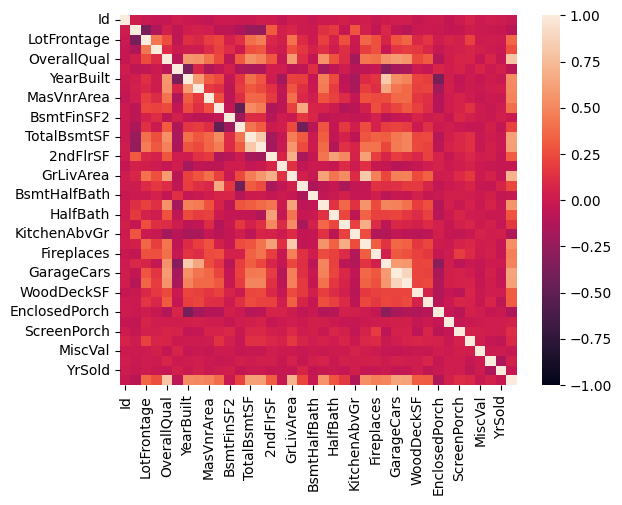

In [76]:


sea.heatmap(df_prices_unclean.select_dtypes(include=np.number).corr(), vmin=-1, vmax=1)
df_prices_corr = df_prices_unclean.select_dtypes(include=np.number).corr()

#this line helps identify highly correlated variables. Can be commented out to view all the data.
df_prices_corr[np.abs(df_prices_corr) > 0.5]

#A correlation chart to help understand how the columns related to eachother.
#the heat map is included for the sake of it, but theres too much data to read it.

In [ ]:
#Generates a ton of scatter plots. Takes a few minutes so comment out if needed.

numeric_cols = df_prices_unclean.select_dtypes(include=[np.number]).columns.tolist()
df_prices_unclean_numerics = df_prices_unclean[numeric_cols].copy()

sea.pairplot(df_prices_unclean_numerics, vars = df_prices_unclean_numerics.columns)


#very useful scatter plot chart of every numeric variable compared to every numeric variable.
#copy & paste it into windows paint to zoom in and stuff.
#this takes 3 min to run, so comment out if you don't need to see it

#this gives a nice view of the distribution of some variables too, such as how the quality variables are integer scales from 1-10

#notably, this can also help identify extremely low variance features, such as LowQualFinSF & PoolArea

#you can also get a general idea  what variables correlate, notably GrLivArea and our target variable, SalePrice are very similar

#this exposes a LOT of related variables by examining whacky scatter plots
#a list of related columns:
"""
YearRemodAdd - YearBuilt 
TotalBsmtSF - BsmtFinSF1 - BsmtFinSF2 - BsmtUnfSF
GrLivArea - basement variables
garageYrBuilt - YrBuilt
"""

'\nYearRemodAdd - YearBuilt \nTotalBsmtSF - BsmtFinSF1 - BsmtFinSF2 - BsmtUnfSF\nGrLivArea - basement variables\ngarageYrBuilt - YrBuilt\n'

In [78]:
#now that the analysis is finished, we can use what we learned to clean the data effectively.

#delete due to being useless conceptially:
to_delete1 = [
    'Id'
]

#delete due to too many NaN:
to_delete2 = [
    'Alley',
    'MasVnrType',
    'PoolQC',
    'Fence',
    'MiscFeature',
    'FireplaceQu'
]

#delete due to extremely low variance (over 95% the same value)
to_delete3 = [
    'MSZoning',
    'Street',
    'Utilities',
    'LandSlope',
    'Condition2',
    'RoofMatl',
    'LowQualFinSF',
    'Heating',
    'PoolArea',
    'MiscVal'
]

#opening the df & dropping whats specified above, based on the EDA
df = pd.read_csv('../data/house_prices/Uncleaned_house_prices.csv')

df = df.drop(columns=to_delete1, errors='ignore')
df = df.drop(columns=to_delete2, errors='ignore')
df = df.drop(columns=to_delete3, errors='ignore')

#for the loops below
feature_columns = df.select_dtypes(include='object').columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

#fill na values of string based columns with the mode
for col in feature_columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode())

#fill NaN values of numeric columns with the median
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

#encode categorical string based features as 0 or 1's
for i in feature_columns:
    my_ohe = skl.preprocessing.OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
    ohetransform = my_ohe.fit_transform(df[[i]])
    df = pd.concat([df, ohetransform], axis=1).drop(columns=[i])

#drops feature columns. Use if not converting features into numbers with the above loop.
""" 
for i in feature_columns:
    df = df.drop(columns = [i])
"""

#encodes MSSubClass as categorical variables, since thats what building classifications are in real life.
my_ohe = skl.preprocessing.OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
ohetransform = my_ohe.fit_transform(df[['MSSubClass']])
df = pd.concat([df, ohetransform], axis=1).drop(columns=['MSSubClass'])




#these combine separated numbers into a single column. Testing showed no noticable change in performance
df['TotalSF'] = df['TotalBsmtSF'] + df['GrLivArea']

#adding baths to one column
df['TotalBath'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']

#I think this is pointless due to the scaler...
df['HouseAge'] = 2025 - df['YearBuilt']
df['YearsSinceRemodel'] = 2025 - df['YearRemodAdd']

#Testing revealed that keeping outliers helped the models perform better.
#notably, for xgboost (tuned) it went from R2 = 0.88 to R2 = 0.92
"""
Q1, Q3 = df['SalePrice'].quantile([0.25, 0.75])
IQR = Q3 - Q1
df = df[(df['SalePrice'] >= Q1 - 1.5*IQR) & (df['SalePrice'] <= Q3 + 1.5*IQR)]
"""

#columns to standardize:
standard_columns = [
    "LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt",
    "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
    "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "BsmtFullBath",
    "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr",
    "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea",
    "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch",
    "ScreenPorch", "MoSold", "YrSold", "TotalBath",	"HouseAge",	"YearsSinceRemodel", "TotalSF"
]



my_scale = skl.preprocessing.StandardScaler()
numeric_cols.remove("SalePrice")
df[standard_columns] = my_scale.fit_transform(df[standard_columns])


df.to_csv('../data/house_prices/house_prices_cleaned_v2.csv', index=False)



df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SalePrice,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_16

Exploration of the newly cleaned data was done by changing the file loaded at the start of this to the newly cleaned data, then browsing the graphs/data.

Further refinement on what to include/exclude in the cleaned data was done via testing the ML algorithms with different cleaned data.